# Практическое задание № 1. Классификация


**Работу выполнил (а):**

Овчинников Павел Алексеевич, 368606

# Распознавание активности человека на основе данных с мобильных сенсоров

Необходимо по данным с мобильных сенсоров при помощи прикладных алгоритмов машинного обучения предсказать активность человека по шести классам движений:
* Движется по прямой
* Движется вверх (например, движение по лестнице вверх)
* Движется вниз (например, движение по лестнице вниз)
* Сидит
* Стоит
* Лежит

## Сведения о наборе данных
Набор данных содержит записи датчиков со сматфонов (акселерометр и гироскоп с частотой дискретизации 50 Гц) от 30 участников, выполняющих следующие действия: ходьба, ходьба по лестнице, ходьба по лестнице, сидение, стояние и лежание. Данные были предварительно обработаны при помощи фильтров шума. Набор данных представлен Хорхе Л. Рейес-Ортисом.

Признаки были извлечены из 3-х осевых необработанных сигналов акселерометра и гироскопа tAcc-XYZ и tGyro-XYZ. Эти сигналы были сняты с постоянной частотой 50 Гц. Затем были отфильтрованны с помощью медианного фильтра и низкочастотного фильтра Баттерворта 3-го порядка с частотой 20 Гц для удаления шумов. Аналогичным образом сигнал ускорения был разделен на сигналы ускорения тела и гравитации (`tBodyAcc-XYZ` и `tGravityAcc-XYZ`) с помощью другого низкочастотного фильтра Баттерворта с угловой частотой 0,3 Гц. Линейное ускорение тела и угловая скорость были использованы для получения сигналов "рывка" — (`tBodyAccJerk-XYZ` и `tBodyGyroJerk-XYZ`). Также величина этих трехмерных сигналов была расчитана с использованием евклидовой нормы — (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`). 

Наконец, к некоторым из этих сигналов было применено быстрое преобразование Фурье (БПФ), в результате чего получились `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Обратите внимание на "f" для обозначения сигналов в частотной области). 

Набор переменных, которые были оценены по этим сигналам, следующий: 
* mean(): Среднее значение
* std(): Стандартное отклонение
* mad(): Среднее абсолютное отклонение 
* max(): Наибольшее значение в массиве
* min(): Наименьшее значение в массиве
* sma(): Область величины сигнала
* energy(): Мера энергии. Сумма квадратов, деленная на количество значений. 
* iqr(): Интерквартильный размах 
* entropy(): Энтропия сигнала
* arCoeff(): Коэффициенты авторегрессии с порядком Burg, равным 4
* correlation(): коэффициент корреляции между двумя сигналами
* maxInds(): индекс частотной составляющей с наибольшей величиной
* meanFreq(): средневзвешенное значение частотных компонент для получения средней частоты
* skewness(): перекос сигнала в частотной области 
* kurtosis(): эксцесс сигнала в частотной области 
* bandsEnergy(): Энергия частотного интервала в пределах 64 бинов БПФ каждого окна.
* angle(): Угол между векторами.
## Импорт библиотек
Первым делом импортируем необходимые библиотеки для работы с данными:

In [1]:
import os
import numpy as np
import pandas as pd

## Считываем набор данных

В прикладных задачах машинного обучения очень важен процесс извлечения признаков (feature extraction), в ходе которого данные интерпретируются в информативные признаки. Также этот процесс может называться проектирование признаков (feature engineering), это весьма трудоемкая и творческая задача. В рамках работы мы опустим эту часть и воспользуемся предобработанными данными. 

In [2]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

df = read_data('data/notebook_files', 'train.csv')
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


Теперь, загрузим полный набор данных и сохранить его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [3]:
def load_dataset(label_dict):
    train_X = read_data('data/notebook_files', 'train.csv').values[:,:-2]
    train_y = read_data('data/notebook_files', 'train.csv')['Activity']
    train_y = train_y.map(label_dict).values
    test_X = read_data('data/notebook_files', 'test.csv').values[:,:-2]
    test_y = read_data('data/notebook_files', 'test.csv')
    test_y = test_y['Activity'].map(label_dict).values
    return(train_X, train_y, test_X, test_y)
label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset(label_dict)

## Логистическая регрессия

Начнём с одного из более простых методов — логистической регрессии. Импортируем эту модель из библиотеки `sklearn` и инициализируем её в объект `model_1`:

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=300)

Хотя логистическая регрессия — более простой метод, она может сработать довольно хорошо, если будет наблюдаться линейная зависимость в данных. Несмотря на то, что это один из базовых классификаторов, он прекрасно справляется с большими объемами данных ввиду своей простоты.

**Гиперпараметры**
- `C` — обратный коэффициент регуляризации. Чем меньше значение, тем сильнее регуляризация. Необходимо для улучшения обобщающей способности модели, то есть уменьшения эффекта переобучения. По умолчанию равен 1.
- `solver` — алгоритм оптимизации, влияющий на скорость и стабильность обучения (`'lbfgs'`, `'liblinear'`, `'newton-cg'`, `'newton-cholesky'`, `'sag'`, `'saga'`). По умолчанию равен `'lbfgs'`.
- `max_iter` — максимальное количество итераций для сходимости оптимизационного алгоритма. По умолчанию равен 100. Мы увеличим до 300, иначе поймаем предупреждение `ConvergenceWarning`, подсказывающее, что алгоритм lbfgs не смог сойтись, т.к. количество итераций слишком мало для такого большого набора данных.
- `penalty` — тип регуляризации. По умолчанию равен 'l2'. Контролирует степень, до которой модель избегает переобучения.

### Обучение модели

Обучим модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

In [5]:
model.fit(train_X, train_y)

LogisticRegression(max_iter=300)

### Оценка модели
Используем обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраним в списке `m1_yhat1`.

In [6]:
yhat = model.predict(test_X)

Сформируем отчёт о классификации, используя функцию `classification_report` из библиотеки `sklearn.metrics` и `test_y` — фактические метки из тестового набора. Этот отчёт содержит информацию о точности, полноте и f1-мере для каждого класса.

In [7]:
from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

print(classification_report(test_y, yhat, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.94      0.99      0.97       496
  Walking Upstairs       0.97      0.94      0.96       471
Walking Downstairs       0.99      0.96      0.98       420
           Sitting       0.97      0.88      0.93       491
          Standing       0.91      0.98      0.94       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



Как мы видим, движение модель распознаёт хорошо, а вот со стоянием и сидением есть проблемы. В случае сидения наблюдается низкий `recall`, т.е. модель часто не распознаёт сидение в принципе. В случае стояния низкий `precision`, т.е. модель часто ошибочно путает стояние с другим классам. И f1-мера для этих классов низкая — метрика, являющая собой гармоническое среднее между точностью и полнотой.

## Метод опорных векторов

Метод опорных векторов (SVM) — это мощный инструмент для решения задач классификации, регрессии и детекции выбросов. Он основан на построении гиперплоскости, разделяющей объекты разных классов в пространстве признаков. SVM отлично работает с высокоразмерными данными, как в этом случае, и хорошо справляется с задачами, требующими четкой границы между классами. SVM может эффективно разделять классы даже в сложных многомерных пространствах, что отлично подходит в нашем случае для 563-мерного вектора данных.

В библиотеке `sklearn` SVM реализован в классе `SVC`. Импортируем его и инициализируем в объект `model_2`.

In [8]:
from sklearn.svm import SVC

model = SVC()
yhat = model.fit(train_X, train_y).predict(test_X)

**Гиперпараметры**
- `C` — коэффициент регуляризации, работает так же, как и в логит-методе.
- `kernel` — тип ядра для преобразования данных, такие как `'linear'`, `'rbf'`, `'poly'`, и `'sigmoid'`. Для сенсорных данных часто лучше работает RBF-ядро, установленное по умолчанию, так как оно учитывает нелинейные зависимости.
- `gamma` — параметр для RBF-ядра, влияющий на степень влияния каждого обучающего примера (чем выше gamma, тем сильнее модель учитывает один). По умолчанию равен `'scale'`, что означает `1 / (n_features * X.var())`, но может быть установлен вручную.

In [9]:
print(classification_report(test_y, yhat, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.94      0.98      0.96       496
  Walking Upstairs       0.93      0.96      0.94       471
Walking Downstairs       0.99      0.91      0.95       420
           Sitting       0.94      0.89      0.91       491
          Standing       0.91      0.95      0.93       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



В среднем модель SVM работает чуть хуже, чем логистическая регрессия, но в целом это не критично, и такой результат тоже вполне приемлем.

## K-Nearest Neighbors

Метод ближайших соседей (KNN) — это простой и интуитивно понятный алгоритм, который используется для задач классификации и регрессии. Он основан на идее того, что объекты одного класса находятся в пространстве признаков близко друг к другу. Этот метод хорошо подходит для задач, где сходные активности (движения) имеют схожие сенсорные данные. KNN можно протестировать в качестве базовой модели, так как это тоже классификатор и в традиционном понимании нейросетевых моделей здесь даже не происходит обучения как такового.

В библиотеке `sklearn` KNN реализован в классе `KNeighborsClassifier`. Импортируем его и инициализируем в объект `model_3`.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
yhat = model.fit(train_X, train_y).predict(test_X)

**Гиперпараметры**
- `n_neighbors` — количество соседей для определения класса. Меньшие значения дают большее внимание ближайшим соседям, что может привести к переобучению. По умолчанию равно 5.
- `weights` — вес для соседей (`'uniform'` или `'distance'`), что позволяет учитывать расстояние при классификации. По умолчанию `'uniform'`.
- `metric` — метрика для измерения расстояний, например, Евклидова или Манхэттенская, в зависимости от природы данных. По умолчанию используется метрика Минковского с параметром `p` равным 2, что соответствует Евклидовой метрике.


In [11]:
print(classification_report(test_y, yhat, target_names=target_names))

                    precision    recall  f1-score   support

           Walking       0.85      0.98      0.91       496
  Walking Upstairs       0.89      0.90      0.90       471
Walking Downstairs       0.95      0.79      0.86       420
           Sitting       0.91      0.79      0.85       491
          Standing       0.83      0.93      0.88       532
            Laying       1.00      0.99      1.00       537

          accuracy                           0.90      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.90      0.90      2947



Как мы видим, в среднем KNN работает гораздо хуже, чем логистическая регрессия и SVM. Это связано с тем, что KNN не учитывает структуру данных и не способен выделить сложные зависимости между признаками, а всего лишь расставляет точки на пространстве и старается разделить их на таргеты, не понимая сути таргетов. В данном случае это приводит к низкой точности и полноте для всех классов.

---

## Вариативность моделей
Мы можем регулировать гиперпаматеры моделей и тем самым корректировать их работу и улучшать результаты. Для этого можно использовать методы оптимизации, такие как `GridSearchCV` или `RandomizedSearchCV`, которые позволяют перебирать различные комбинации гиперпараметров и находить наилучшие. Но для наглядности мы вручную изменим гиперпараметры моделей и посмотрим, как это повлияет на предсказание модели.

Для начала напишем функции: одна будет визуализировать результаты модели с помощью матрицы ошибок, а другая — тренировать модель и заряжать в неё тестовые данные, для получения предиктов.

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


def perform(ys, tnames, axnames):
    _, axes = plt.subplots(1, len(axnames), figsize=(24, 5))
    for y_pred, (i, name) in zip(ys, enumerate(axnames)):
        ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred), display_labels=tnames).plot(
            ax=axes[i]
        )
        axes[i].set_title(name)
        axes[i].set_xlabel('Предсказание')
        axes[i].set_ylabel('Истина')
    plt.show()

def get_ys(models):
    return [model.fit(train_X, train_y).predict(test_X) for model in models]

### Логистическая регрессия
Начнём c логистической регрессии. Попробуем изменить алгоритм оптимизации `solver`, тип регуляризации `penalty` и коэффициент регуляризации `C`. 

In [13]:
yhats = get_ys(
    (
        LogisticRegression(max_iter=300),
        LogisticRegression(penalty='l2', max_iter=300),
        LogisticRegression(solver='newton-cg', max_iter=300),
        LogisticRegression(C=0.2, max_iter=300),
    )
)

Обучение всех 4 моделей заняло 40.1 секунды.

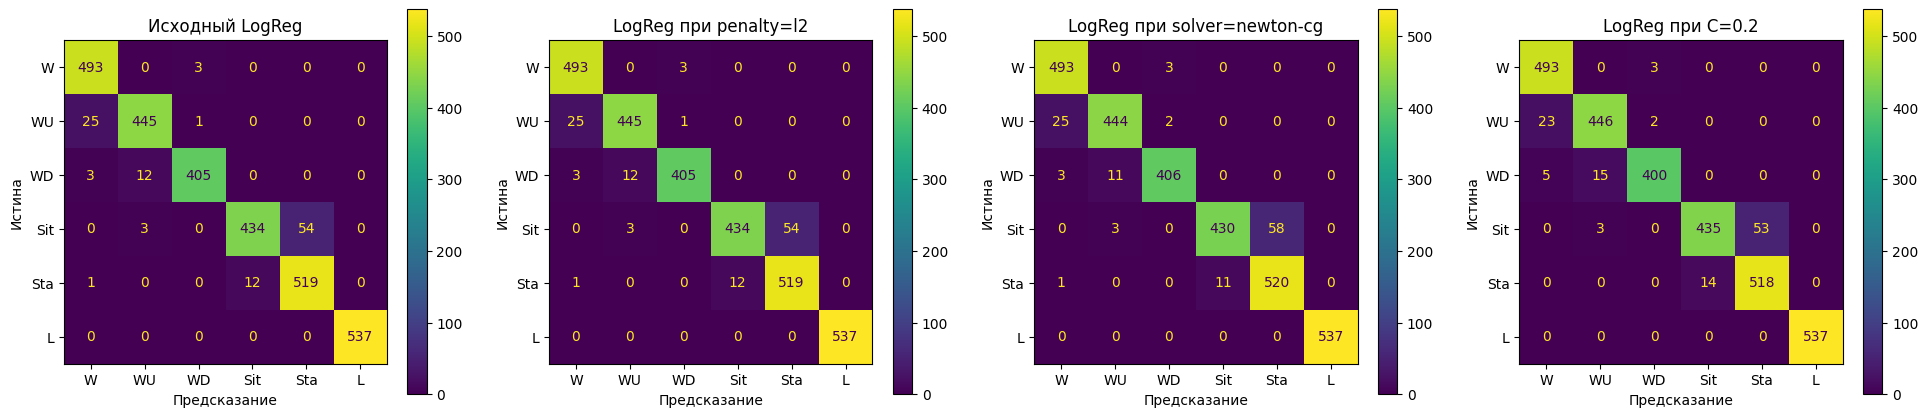

In [14]:
# Избегаем длинных названий классов в графиках
# W - Walking, WU - Walking Upstairs, WD - Walking Downstairs, Sit - Sitting, Sta - Standing, L - Laying
perform(
    yhats,
    ('W', 'WU', 'WD', 'Sit', 'Sta', 'L'),
    ('Исходный LogReg', 'LogReg при penalty=l2', 'LogReg при solver=newton-cg', 'LogReg при C=0.2'),
)

Мы можем наблюдать, что больше всего изменений в предсказаниях произошло именно при изменении гиперпараметра `C`. Это связано с тем, что коэффициент регуляризации влияет на степень регуляризации модели, и, как следствие, на её обобщающую способность. В данном случае уменьшение `C` привело к ухудшению предсказаний модели. Но в целом изменения незначительны, логистическая регрессия на этих данных устойчива к изменениям гиперпараметров.

### Метод опорных векторов

Теперь попробуем изменить гиперпараметры модели SVM. Попробуем изменить тип ядра `kernel`, коэффициент регуляризации `C` и параметр для RBF-ядра `gamma`.

In [15]:
yhats = get_ys(
    (
        SVC(),
        SVC(kernel='sigmoid'),
        SVC(C=0.1),
        SVC(gamma=0.1),
    )
)

Обучение всех 4 моделей заняло 1 минуту и 2.5 секунды.

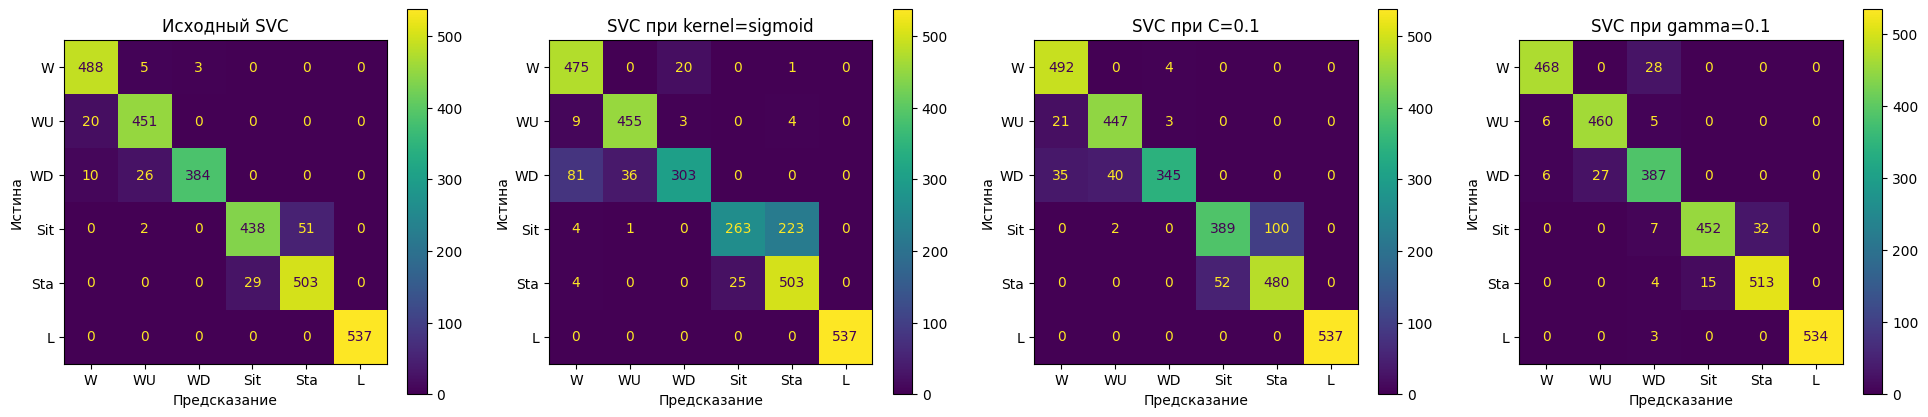

In [16]:
perform(
    yhats,
    ('W', 'WU', 'WD', 'Sit', 'Sta', 'L'),
    ('Исходный SVC', 'SVC при kernel=sigmoid', 'SVC при C=0.1', 'SVC при gamma=0.1'),
)

При смене ядра на сигмоиду модель посыпалась и начала определять «движение вниз», как «движение по прямой», а также много раз перепутала «сидение» со «стоянием». При уменьшении `C` модель стала чаще определять «движение вниз» как «движение вверх» и «движение по прямой». При изменении `gamma` на 0.1 модель, кажется, исправляет ошибки исходного SVC, но в целом результаты остаются примерно такими же. Модель на этих данных неустойчива к изменениям гиперпараметров — а значит мы можем регулировать их, чтобы улучшить результат.

### K-Nearest Neighbors

Теперь попробуем изменить гиперпараметры модели KNN. Попробуем изменить количество соседей `n_neighbors`, веса для соседей `weights` и метрику для измерения расстояний `metric`.

In [17]:
yhats = get_ys(
    (
        KNeighborsClassifier(),
        KNeighborsClassifier(n_neighbors=2),
        KNeighborsClassifier(weights='distance'),
        KNeighborsClassifier(metric='manhattan'),
    )
)

Обучение заняло рекордные 8.2 секунды.

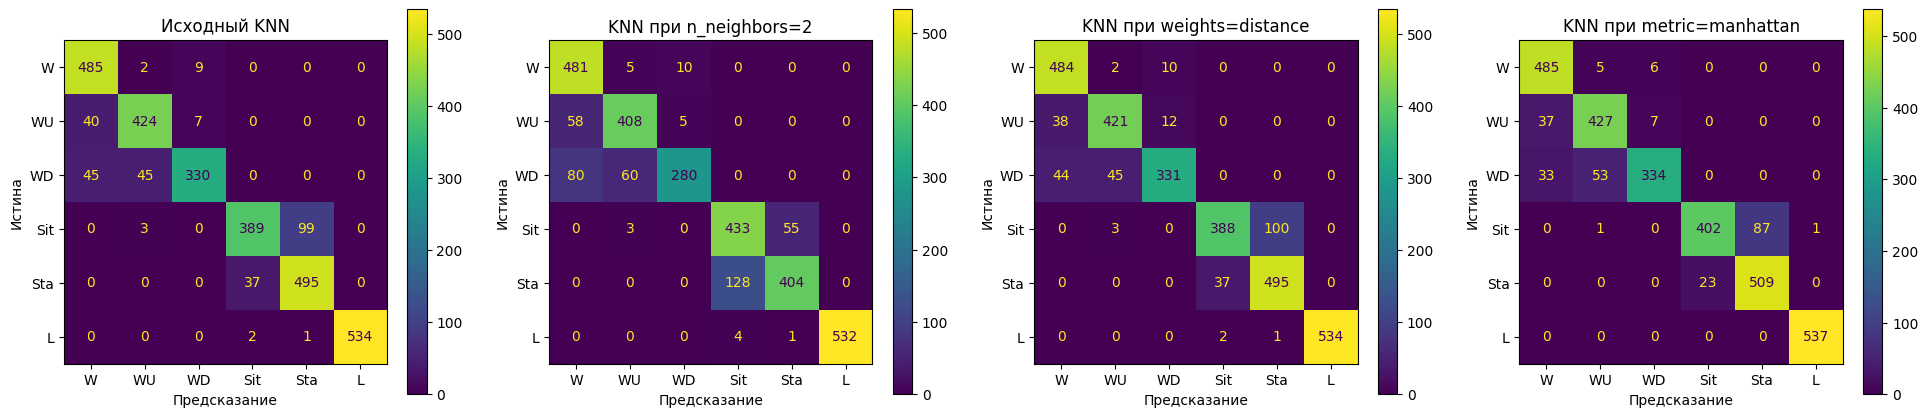

In [18]:
perform(
    yhats,
    ('W', 'WU', 'WD', 'Sit', 'Sta', 'L'),
    ('Исходный KNN', 'KNN при n_neighbors=2', 'KNN при weights=distance', 'KNN при metric=manhattan'),
)

При уменьшении количества соседей до 2 модель переобучилась, поэтому не смогла на тестовом наборе корректно определить, к какому классу они принадлежат, и стала ещё сильнее путать классы между собой. При изменении весов на `distance` модель стала лучше определять классы движения, но стала чаще путать в классах «сидение» и «стояние». При изменении метрики на `manhattan` модель показала себя лучше всего, в том числе лучше исходного KNN. В целом KNN на этих данных показывает себя хуже, чем логистическая регрессия и SVM, и неустойчив к изменениям гиперпараметров. И как мы видим, изменение метрики на Манхэттенскую дало наилучший результат (модель наконец-то корректно определяет класс «лежание»!)

---

## Результаты сравнения
Выберем модель с наилучшими гиперпараметрами в каждом из трёх случаев и сравним их результаты по тепловой карте с матрицей ошибок. 

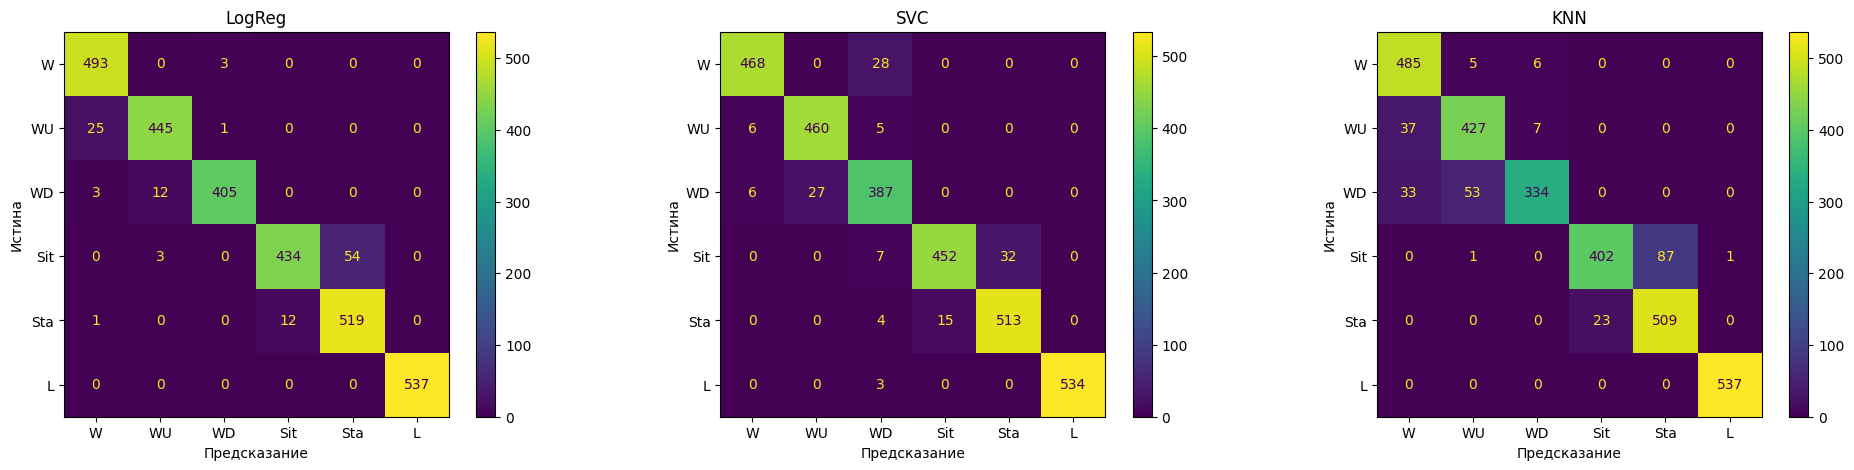

In [19]:
yhats = get_ys(
    (
        LogisticRegression(max_iter=300),
        SVC(gamma=0.1),
        KNeighborsClassifier(metric='manhattan'),
    )
)

perform(
    yhats,
    ('W', 'WU', 'WD', 'Sit', 'Sta', 'L'),
    ('LogReg', 'SVC', 'KNN'),
)

Лучше всех отрабатывает логистическая регрессия. Она допустила наименьшее количество ошибок в сравнении с другими моделями.